<a href="https://colab.research.google.com/github/SerhiiAndreiko/HW_DATA_06/blob/main/HW_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1


У цьому завданні вам потрібно завантажити ось [цей](https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view) датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [55]:
import pandas as pd


dataset_2d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_2d.csv')
dataset_mnist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/mnist.csv')


In [ ]:
dataset_2d.info()

In [ ]:
dataset_mnist.info()


In [ ]:
first_image = dataset_mnist.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(first_image, cmap='gray')
plt.show()


**алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористаємось ліктевим методом.**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

# Визначення можливих кількостей кластерів
possible_k_values = range(1, 200)

# Обчислення інерції для кожної кількості кластерів
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_2d)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(12, 8))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for dataset-2D')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Визначення можливих кількостей кластерів
possible_k_values = range(1, 21)
inertia_values = []

# Обчислення інерції для кожної кількості кластерів
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_2d)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(12, 8))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for dataset-2D')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



Використаємо підхід PCA який може бути корисним для вибору кількості головних компонентів, які слід використовувати для зменшення розмірності даних перед застосуванням методу K-means.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Нормалізація даних
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset_mnist)

# PCA
pca = PCA()
pca_result = pca.fit_transform(normalized_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Візуалізація результатів
plt.figure(figsize=(15, 9))
plt.grid(True)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()



In [ ]:
# Вибір кількості головних компонентів, які пояснюють 80% дисперсії
cumulative_variance_ratio = 0
n_components = 0

for explained_variance in explained_variance_ratio:
    cumulative_variance_ratio += explained_variance
    n_components += 1
    if cumulative_variance_ratio >= 0.8:
        break

print("Кількість головних компонентів, що пояснюють 80% дисперсії:", n_components)


In [ ]:
inertia_values = []

possible_k_values = range(1, 64)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(dataset_mnist)
    inertia_values.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Вибір оптимальної кількості кластерів
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=0, init='k-means++', n_init=10, max_iter=300).fit(dataset_2d)

print("Назви колонок:", dataset_2d.columns)

plt.scatter(dataset_2d.iloc[:, 1], dataset_2d.iloc[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x', s=200, linewidths=3)



plt.title('KMeans Clustering with Centers')
plt.xlabel(dataset_2d.columns[0])
plt.ylabel(dataset_2d.columns[1])
plt.show()




In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


data_for_tsne_mnist = dataset_mnist.iloc[:, 0:]


pca_mnist = PCA(n_components=499)
pca_result_mnist = pca_mnist.fit_transform(data_for_tsne_mnist)

tsne_mnist = TSNE(n_components=2, random_state=0)
tsne_result_mnist = tsne_mnist.fit_transform(pca_result_mnist)

plt.figure(figsize=(12, 8))
plt.grid(2)
plt.scatter(tsne_result_mnist[:, 0], tsne_result_mnist[:, 1], marker='o', s=20, c='r', cmap='viridis', edgecolor='k')

plt.title('t-SNE Visualization of the MNIST Dataset')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

def visualize_clustering_results(data_for_clustering, n_clusters):
    # Зменшення розмірності за допомогою PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_for_clustering)

    # Кластеризація з використанням KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(data_pca)

    # Візуалізація результатів з границями кластерів
    plt.figure(figsize=(15, 11))
    plot_decision_regions(X=data_pca, y=kmeans.labels_, clf=kmeans, legend=1)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers', edgecolor='black')

    plt.title('KMeans Clustering with Cluster Boundaries')
    plt.show()

# Вибір датасету для кластеризації
data_for_clustering = dataset_2d

# Кількість кластерів для кластеризації
n_clusters = 7

# Візуалізація результатів кластеризації
visualize_clustering_results(data_for_clustering, n_clusters)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


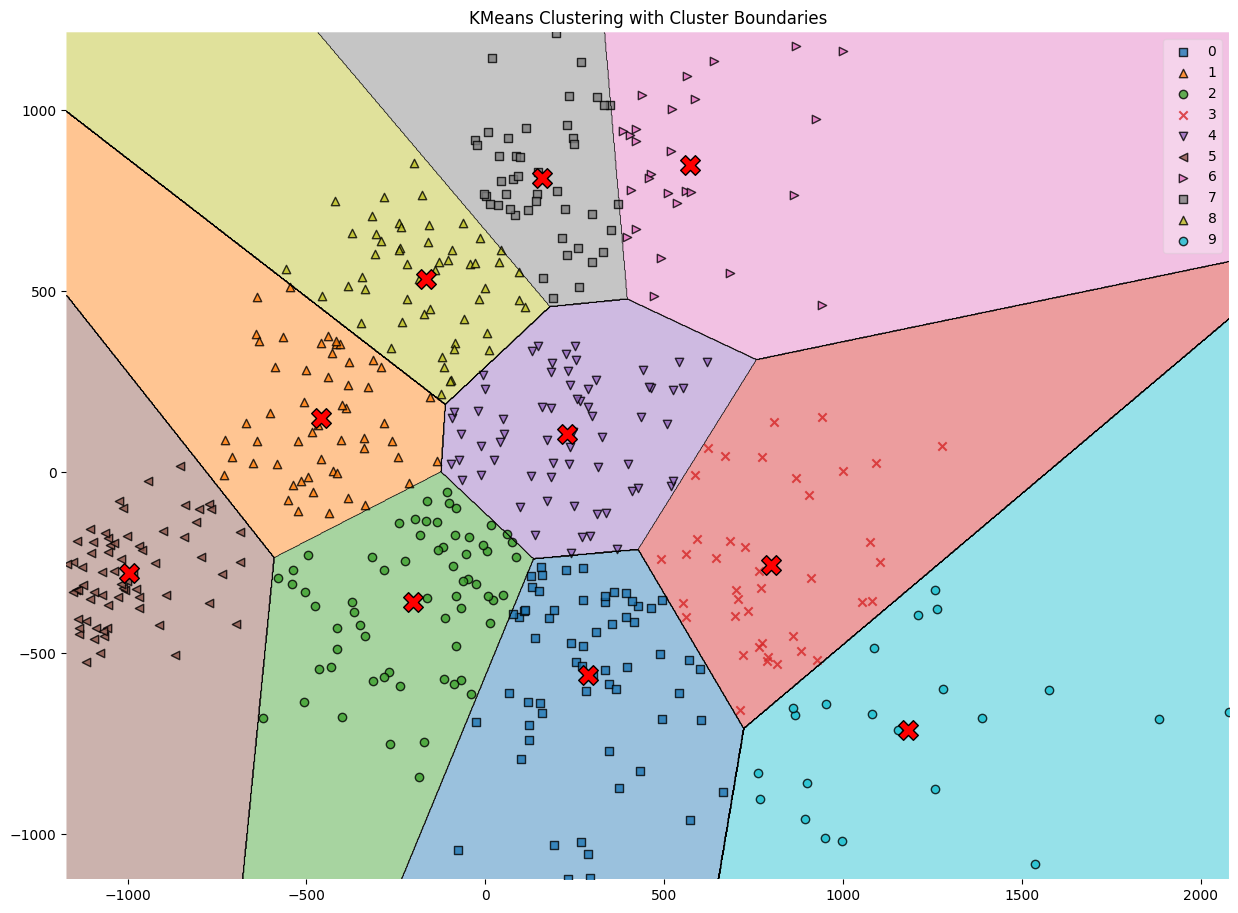

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

# Функція для візуалізації результатів кластеризації
def visualize_clustering_results(data_for_clustering, n_clusters):
    # Зменшення розмірності за допомогою PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_for_clustering)

    # Кластеризація з використанням KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(data_pca)

    # Візуалізація результатів з границями кластерів
    plt.figure(figsize=(15, 11))
    plot_decision_regions(X=data_pca, y=kmeans.labels_, clf=kmeans, legend=1)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers', edgecolor='black')

    plt.title('KMeans Clustering with Cluster Boundaries')
    plt.show()

# Вибір датасету для кластеризації
data_for_clustering = dataset_mnist
# Кількість кластерів для кластеризації
n_clusters = 10

# Візуалізація результатів кластеризації
visualize_clustering_results(data_for_clustering, n_clusters)
